In [1]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [3]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 1A36-9B4C

 Directory of C:\Users\svats21\Documents\ExcelR

02-01-2022  10:19    <DIR>          .
02-01-2022  10:19    <DIR>          ..
26-12-2021  10:36    <DIR>          .ipynb_checkpoints
04-12-2021  11:25           370,510 AI [Regression ].ipynb
19-12-2021  12:39            53,130 Association Rules.ipynb
19-12-2021  11:32             7,328 Bagging_Random Forest_Boosting_Stacking.ipynb
20-11-2021  11:28            87,155 beml_df.csv
05-12-2021  11:59             3,527 Cars.csv
20-11-2021  12:40         2,014,447 Chapter 1_ Descriptive Statistics and the Normal Distribution – Natural Resources Biometrics.pdf
20-11-2021  12:40         1,794,881 Chapter 2_ Sampling Distributions and Confidence Intervals – Natural Resources Biometrics.pdf
20-11-2021  12:41         3,432,196 Chapter 3_ Hypothesis Testing – Natural Resources Biometrics.pdf
11-12-2021  11:49            29,822 claimants (1).csv
12-12-2021  12:44        13,404,573 cluste

In [4]:
filename = 'pima-indians-diabetes.data (2).csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [5]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
X=(X-X.min(axis=0))/X.max(axis=0)

In [5]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.2268595 ,
        0.35802469],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11280992,
        0.12345679],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.24545455,
        0.13580247],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.06900826,
        0.11111111],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11198347,
        0.32098765],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.09793388,
        0.02469136]])

In [6]:
num_folds = 10
kfold = KFold(n_splits=10)

In [7]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [8]:
print(results.mean())

0.7500341763499658


### Grid Search for Algorithm Tuning

In [8]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
filename = 'pima-indians-diabetes.data (2).csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [10]:
n_neighbors = numpy.array([2*i+1 for i in range(0,10)])
param_grid = dict(n_neighbors=n_neighbors)

In [11]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [12]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [13]:
print(grid.best_score_)
print(grid.best_params_ )

0.7552584670231729
{'n_neighbors': 13}


### Visualizing the CV results


Bad key "text.kerning_factor" on line 4 in
/Users/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


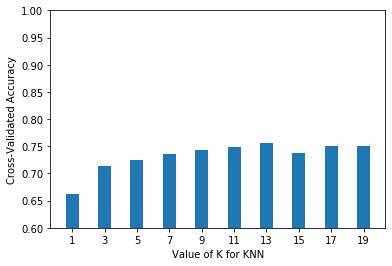

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,10)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()